In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from time import time
%matplotlib inline

In [ ]:
#Load in the data
url = "https://raw.githubusercontent.com/bopola/Tech4Dev_Bella/main/heart.csv"
heart = pd.read_csv(url)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#check for null values
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing data in this dataset

In [ ]:
#statistical summary of the dataset
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Univariate Analysis
Observations on a single characteristics or attribute

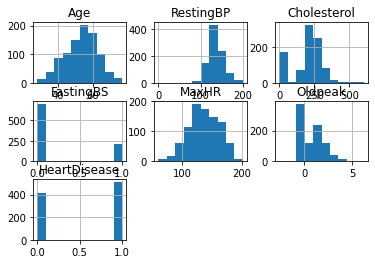

In [ ]:
heart[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']].hist()
plt.show()

###### Age

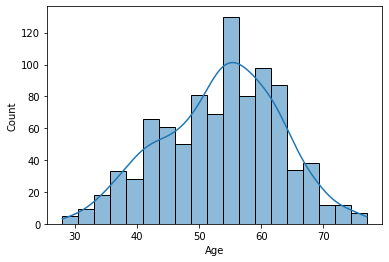

In [ ]:
sb.histplot(heart.Age, kde=True);

We see that age of individuals in this dataset is slighly skewed to the left with 55 being the peak age

###### Sex

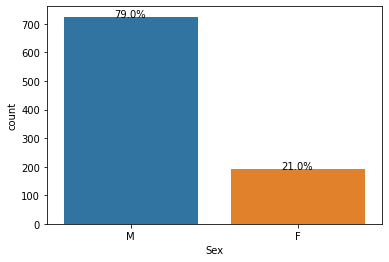

In [ ]:
total = heart.shape[0]
ax = sb.countplot(x=heart.Sex)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y));

We see 21% of our data is female, so we should expect a bias towards male

###### Chest Pain Type

In [ ]:
heart.ChestPainType.value_counts().sort_values(ascending=False).index.to_list()

['ASY', 'NAP', 'ATA', 'TA']

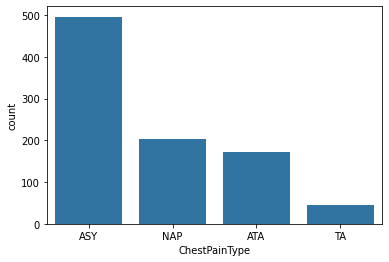

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(x=heart.ChestPainType, color=base_color, order=heart.ChestPainType.value_counts().sort_values(ascending=False).index.to_list());

Angina is a type of chest pain caused by reduced blood flow to the heart  
TA: Typical Angina  
ATA: Atypical Angina  
NAP: Non-Anginal Pain  
ASY: Asymptomatic

###### Resting BP and Cholesterol

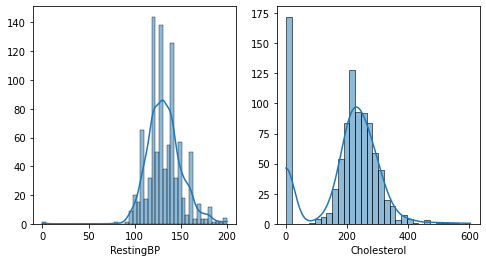

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sb.histplot(heart.RestingBP, kde=True)
plt.ylabel("")

plt.subplot(1,2,2)
sb.histplot(heart.Cholesterol, kde=True)
plt.ylabel("");

BP: We have some very low values, lower than 75, however the values between 75 and 200 seem to follow a normal distribution. We can further explore for outliers.  
Cholesterol: We see many values with 0 cholesterol, which is unusual

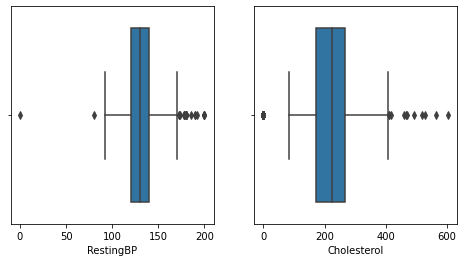

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sb.boxplot(x=heart.RestingBP)
plt.ylabel("")

plt.subplot(1,2,2)
sb.boxplot(x=heart.Cholesterol)
plt.ylabel("");


We see 2 outliers with resting bp below 80mmHg, and several with very high resting BPs above 170mmhg

In [ ]:
heart[heart.RestingBP < 90]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Could there be an error in the entries? Having resting bp and/or cholesterol seems unusual  

NB: FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

In [ ]:
heart[heart.RestingBP > 170]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [ ]:
heart[(heart.RestingBP==0)|heart.Cholesterol==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Many rows with weird cholestrol and/or resting bp

###### Fasting Blood Sugar


In [ ]:
(172/918)*100

18.736383442265794

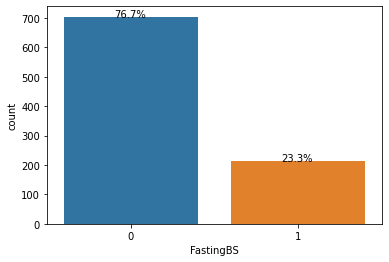

In [ ]:
ax=sb.countplot(x=heart.FastingBS)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y));

23.3% of individuals had a fasting blood sugar > 120 mg/dl

###### Maximum Heart Rate

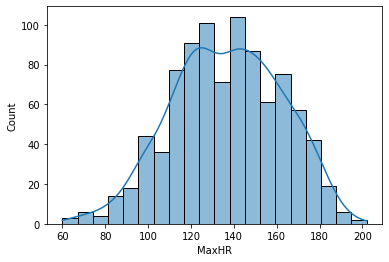

In [ ]:
sb.histplot(heart.MaxHR, kde=True);

###### Old Peak

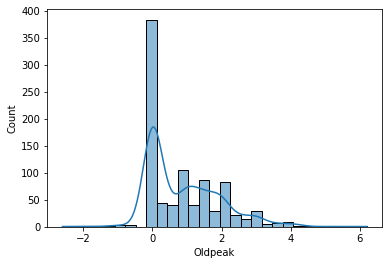

In [ ]:
sb.histplot(heart.Oldpeak, kde=True);

##### Resting ECG

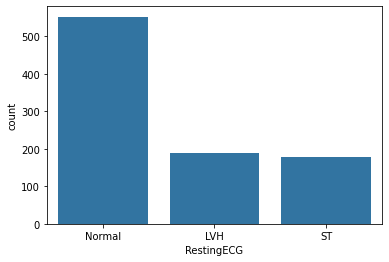

In [ ]:
sb.countplot(x=heart.RestingECG, color=base_color, order=heart.RestingECG.value_counts().sort_values(ascending=False).index.to_list());

Normal: Normal  
ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

###### Excercise Angina

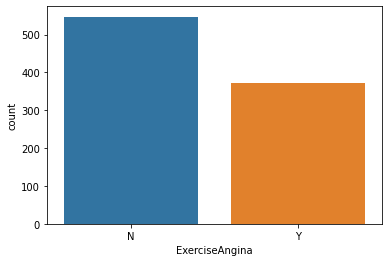

In [ ]:
sb.countplot(x=heart.ExerciseAngina);

###### ST Slope

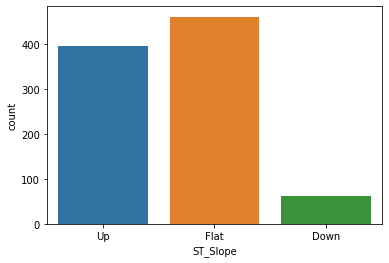

In [ ]:
sb.countplot(x=heart.ST_Slope);

###### Heart Disease

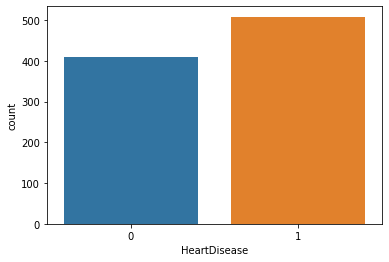

In [ ]:
sb.countplot(x=heart.HeartDisease);

### Bivariate Analysis

In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

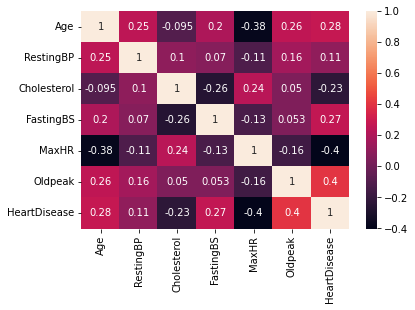

In [ ]:
sb.heatmap(heart.corr(), annot=True)

We notice very little correlation among the variables

###### Age and Heart Disease

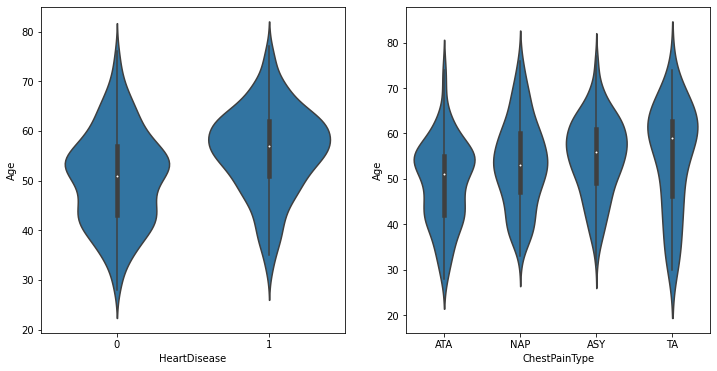

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.violinplot(data=heart, x="HeartDisease", y="Age", color=base_color)

plt.subplot(1,2,2)
sb.violinplot(data=heart, x="ChestPainType", y="Age", color=base_color)


From the plot, we notice there are fewer young people, <40 years with heart disease than old people with most people with heart disease being above 50 years.

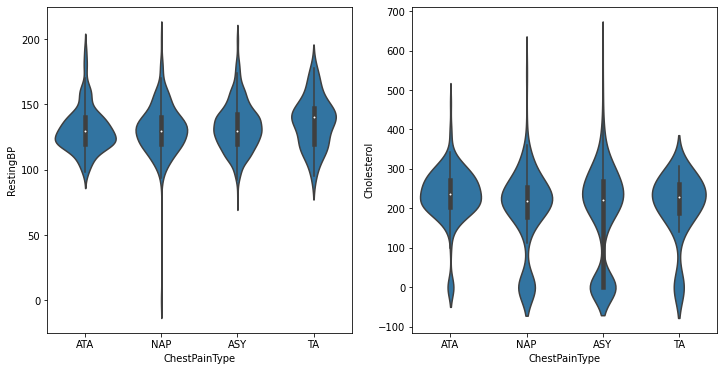

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.violinplot(data=heart, x="ChestPainType", y="RestingBP", color=base_color)

plt.subplot(1,2,2)
sb.violinplot(data=heart, x="ChestPainType", y="Cholesterol", color=base_color)


The different classes of chest pain seem to have similar resting BPs, same with cholesterol

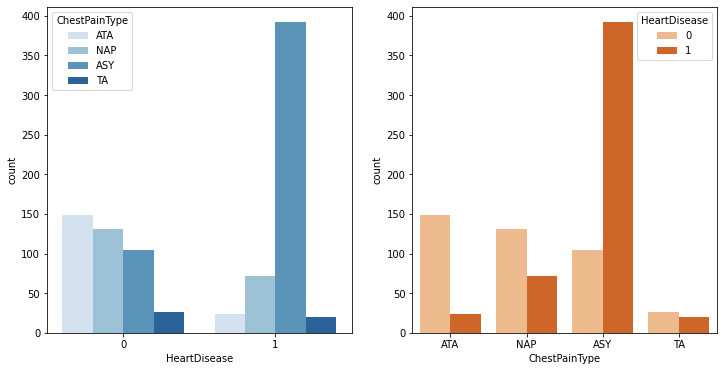

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=heart, hue= "ChestPainType", x="HeartDisease", palette="Blues");


plt.subplot(1,2,2)
sb.countplot(data=heart, x= "ChestPainType", hue="HeartDisease", palette="Oranges");




TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  

We see that even people withput heart disease had some form of chest pain, most people with heart disease were asymptomatic. 
Generally, most people were asymptomatic, and a higher proportion of asymptomatic patients had heart disease, very few people had typical angina.

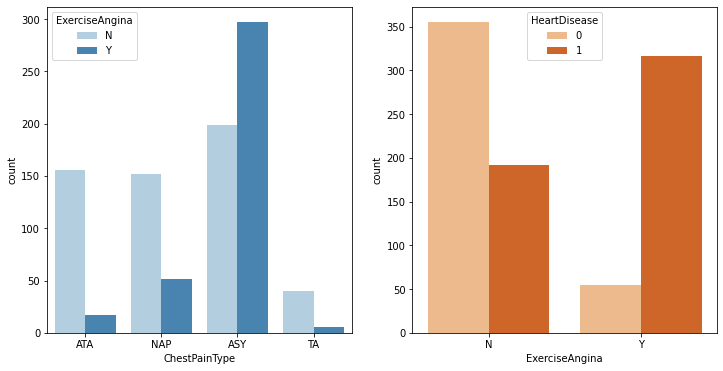

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=heart, x= "ChestPainType", hue="ExerciseAngina", palette="Blues");


plt.subplot(1,2,2)
sb.countplot(data=heart, x= "ExerciseAngina", hue="HeartDisease", palette="Oranges");





Also, a higher proportion of those that were asymptomatic had exercise induced angina. A small proportion of those without heart disease had exercise induced angina.

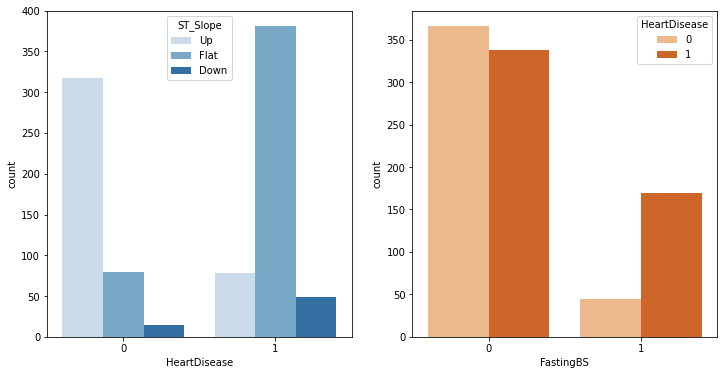

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=heart, hue= "ST_Slope", x="HeartDisease", palette="Blues");


plt.subplot(1,2,2)
sb.countplot(data=heart, x= "FastingBS", hue="HeartDisease", palette="Oranges");




A large proportionof patients with heart disease had  Flat ST Slope, and Up slope was most common among those without heart disease

#### Clean the Data

In [ ]:
#replace 0 values with ffill
heart['Cholesterol'].replace(to_replace = 0,  method='ffill', inplace=True)
heart['Cholesterol'].value_counts()

182    128
236     17
203     13
230     12
254     11
      ... 
344      1
347      1
412      1
529      1
131      1
Name: Cholesterol, Length: 221, dtype: int64

In [ ]:
##replace 0 values with ffill
heart['RestingBP'].replace(to_replace = 0,  method='ffill', inplace=True)
heart['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 66, dtype: int64

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Modelling and Prediction

## Preprocessing
X as the features

y as the target

In [ ]:
#import machine learning libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
 X = heart.loc[:, ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
 X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
#convert categorical data to numeric
le_Sex = LabelEncoder()
le_ChestPainType = LabelEncoder()
le_FastingBS = LabelEncoder()
le_RestingECG = LabelEncoder()
le_ExerciseAngina = LabelEncoder()
le_ST_Slope = LabelEncoder()


In [ ]:
#use fit_transform
X['Sex'] = le_Sex.fit_transform(X['Sex'])
X['ChestPainType'] = le_ChestPainType.fit_transform(X['ChestPainType'])
X['FastingBS'] = le_FastingBS.fit_transform(X['FastingBS'])
X['RestingECG'] = le_RestingECG.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le_ExerciseAngina.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le_ST_Slope.fit_transform(X['ST_Slope'])

#convert float to int
X['Oldpeak'] = X['Oldpeak'].astype('int')
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0,2
1,49,0,2,160,180,0,1,156,0,1,1
2,37,1,1,130,283,0,2,98,0,0,2
3,48,0,0,138,214,0,1,108,1,1,1
4,54,1,2,150,195,0,1,122,0,0,2


In [ ]:
#run onehotencoder
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(X[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]]).toarray())
enc_df.columns = enc.get_feature_names_out(input_features=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])
enc_df

,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X = X.join(enc_df)
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,1,1,140,289,0,1,172,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,2,160,180,0,1,156,0,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1,130,283,0,2,98,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,0,0,138,214,0,1,108,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,1,2,150,195,0,1,122,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,1,0,144,193,1,1,141,0,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,1,0,130,131,0,1,115,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,0,1,130,236,0,0,174,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
feat_list = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
X.drop(columns = feat_list, axis = 1, inplace =True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               918 non-null    int64  
 1   RestingBP         918 non-null    int64  
 2   Cholesterol       918 non-null    int64  
 3   FastingBS         918 non-null    int64  
 4   MaxHR             918 non-null    int64  
 5   Oldpeak           918 non-null    int64  
 6   Sex_0             918 non-null    float64
 7   Sex_1             918 non-null    float64
 8   ChestPainType_0   918 non-null    float64
 9   ChestPainType_1   918 non-null    float64
 10  ChestPainType_2   918 non-null    float64
 11  ChestPainType_3   918 non-null    float64
 12  RestingECG_0      918 non-null    float64
 13  RestingECG_1      918 non-null    float64
 14  RestingECG_2      918 non-null    float64
 15  ExerciseAngina_0  918 non-null    float64
 16  ExerciseAngina_1  918 non-null    float64
 1

In [ ]:
 y = heart.loc[:, ['HeartDisease']]
 y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HeartDisease  918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


## Train/Test/Split


We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [ ]:
#split/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print('X_train is:', X_train.shape)
print('y_train is :', y_train.shape)

X_train is: (642, 20)
y_train is : (642, 1)


## <font color = 'green'>MODELS<font>

### 1. Logistic Regression

In [ ]:
#instantite the model
from sklearn.linear_model import LogisticRegression
lr = LR = LogisticRegression(C=0.01, solver='liblinear')
t0 = time()

#fit the model
lr.fit(X_train,y_train)

# model score ant training time
lr_score = lr.score(X_test,y_test)

print("Logistic Regression Score: ", lr_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

Logistic Regression Score:  0.8514492753623188
Training time: 0.015 seconds.


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#predict
pred_lr = lr.predict(X_test)
pred_lr[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, pred_lr))

Logistic Regression's Accuracy:  0.8514492753623188


In [ ]:
# evaluation confusion matrix
conf_mat_lr =(confusion_matrix(y_test,pred_lr, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_lr

array([[133,  18],
       [ 23, 102]])

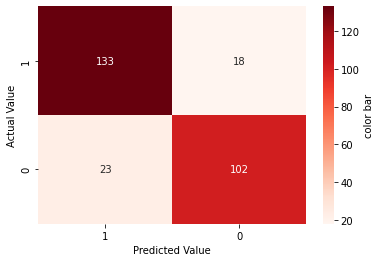

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_lr, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       125
           1       0.85      0.88      0.87       151

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



### 2. Decision Tree 

In [ ]:
#instantite the model
dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state = 42)

#fit the model
dt.fit(X_train,y_train)

#Calculate time
t0 = time()

# model score
dt_score = dt.score(X_test,y_test)

print("Decision Tree's Score: ", dt_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

Decision Tree's Score:  0.8188405797101449
Training time: 0.007 seconds.


In [ ]:
#predict
pred_dt = dt.predict(X_test)
pred_dt[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_dt))

DecisionTrees's Accuracy:  0.8188405797101449


In [ ]:
# evaluation confusion matrix
conf_mat_dt =(confusion_matrix(y_test,pred_dt, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_dt

array([[126,  25],
       [ 25, 100]])

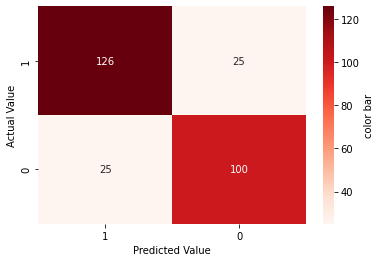

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_dt, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       125
           1       0.83      0.83      0.83       151

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



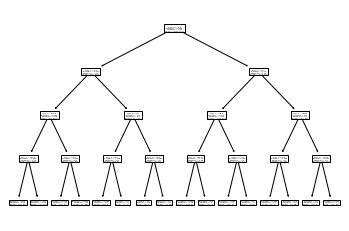

In [ ]:
#visualize the decision tree!
tree.plot_tree(dt)
plt.show()

### 3. Random Forest

In [ ]:
# import and Instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)

#Calculate time
t0 = time()

#fit the model
rf.fit(X_train, y_train)

#calculate score
rf_score = rf.score(X_test, y_test)

print("Random Forest Score: ", rf_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

<ipython-input-89-b397bc12d036>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest Score:  0.8985507246376812
Training time: 1.871 seconds.


In [ ]:
#predict
pred_rf = rf.predict(X_test)
pred_rf[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forests's Accuracy: ", metrics.accuracy_score(y_test, pred_rf))

Random Forests's Accuracy:  0.8985507246376812


In [ ]:
# evaluation confusion matrix
conf_mat_rf =(confusion_matrix(y_test,pred_rf, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_rf

array([[139,  12],
       [ 16, 109]])

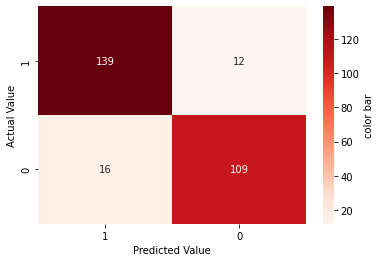

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_rf, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       125
           1       0.90      0.92      0.91       151

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



### 4. Support Vector Machine (SVM)

In [ ]:
# import and Instantiate the model
from sklearn.svm import SVC
svmc = SVC()

#Calculate time
t0 = time()

#fit the model
svmc.fit(X_train, y_train)

#calculate score
svmc_score = svmc.score(X_test, y_test)

print("SVM Score: ", svmc_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))


SVM Score:  0.7246376811594203
Training time: 0.048 seconds.


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#predict
pred_svmc = svmc.predict(X_test)
pred_svmc[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, pred_svmc))

SVM's Accuracy:  0.7246376811594203


In [ ]:
# evaluation confusion matrix
conf_mat_svmc =(confusion_matrix(y_test,pred_svmc, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_svmc

array([[132,  19],
       [ 57,  68]])

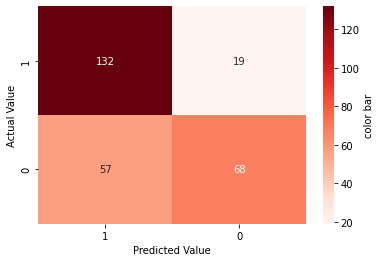

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_svmc, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_svmc))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       125
           1       0.70      0.87      0.78       151

    accuracy                           0.72       276
   macro avg       0.74      0.71      0.71       276
weighted avg       0.74      0.72      0.72       276



### 5. KNN

In [ ]:
# import and Instantiate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)

#calculate time
t0 = time()

#fit the model
knn.fit(X_train, y_train)

#calculate score
knn_score = knn.score(X_test, y_test)

print("KNN Score: ", knn_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))


KNN Score:  0.75
Training time: 0.038 seconds.


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#predict
pred_knn = knn.predict(X_test)
pred_knn[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, pred_knn))

KNN's Accuracy:  0.75


In [ ]:
# evaluation confusion matrix
conf_mat_knn =(confusion_matrix(y_test,pred_knn, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_knn

array([[133,  18],
       [ 51,  74]])

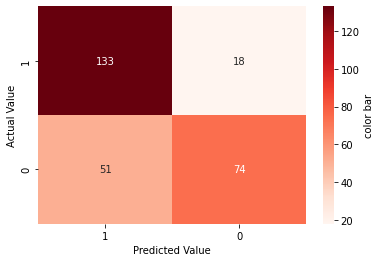

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_knn, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68       125
           1       0.72      0.88      0.79       151

    accuracy                           0.75       276
   macro avg       0.76      0.74      0.74       276
weighted avg       0.76      0.75      0.74       276



### 6. Bagging

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=20, random_state=0)

#calculate time 
t0 = time()

#fit the model
bag.fit(X_train, y_train)

#calculate score
bag_score = bag.score(X_test, y_test)
bag_score

print("Bagging Score: ", bag_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

Bagging Score:  0.8478260869565217
Training time: 0.093 seconds.


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#predict
pred_bag = bag.predict(X_test)
pred_bag[0:5]

array([1, 1, 1, 0, 0])

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("Bagging's Accuracy: ", metrics.accuracy_score(y_test, pred_bag))

Bagging's Accuracy:  0.8478260869565217


In [ ]:
# evaluation confusion matrix
conf_mat_bag =(confusion_matrix(y_test,pred_bag, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_bag

array([[128,  23],
       [ 19, 106]])

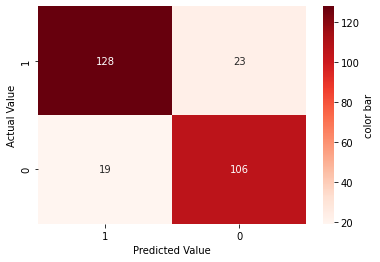

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_bag, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_bag))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       125
           1       0.87      0.85      0.86       151

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



#  _- The End -_